In [664]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [665]:
Transactions=pd.read_excel('2022 Case challenge_ DA update.xlsx',sheet_name='Data. Transactions')

In [666]:
Transactions=Transactions[['User_id','Order_id','DATE','GMV','Service Group','MerchantID']]


In [667]:
Transactions['User_id']=Transactions['User_id'].astype(str)
Transactions['Order_id']=Transactions['Order_id'].astype(str)
Transactions['MerchantID']=Transactions['MerchantID'].astype(str)

In [668]:
Transactions.head()

,User_id,Order_id,DATE,GMV,Service Group,MerchantID
0,61386143,8733622706,2021-01-01,100000,marketplace,37
1,48453125,8726857991,2021-01-01,5000,supermarket,9
2,49921027,8737326894,2021-01-01,106600,supermarket,9
3,46022523,8732579078,2021-01-01,270000,supermarket,9
4,44014594,8725567343,2021-01-01,68000,cvs,8


In [669]:
Total_GMV=Transactions['GMV'].sum()
print('Tổng tiền :{:,.0f}'.format(Total_GMV)+' VND')


Tổng tiền :7,561,407,694 VND


In [670]:
Loyalty_Points=pd.read_excel('2022 Case challenge_ DA update.xlsx',sheet_name='Data. Loyalty Points')

In [671]:
Loyalty_Points

,Service Group,Point Mechanism,Maximum Point Per Trans
0,supermarket,1 points/1000VND GMV,500 points
1,data,10 points/1000VND GMV,1000 points
2,cvs,1 points/1000VND GMV,300 points
3,marketplace,1 points/1000VND GMV,500 points
4,Coffee chains and Milk tea,1 points/1000VND GMV,500 points
5,Offline Beverage,1 points/1000VND GMV,300 points


In [672]:
Loyalty_Benefits=pd.read_excel('2022 Case challenge_ DA update.xlsx',sheet_name='Data. Loyalty benefits')

In [673]:
Loyalty_Benefits['Class ID']=Loyalty_Benefits['Class ID'].astype(str)
Loyalty_Benefits

,Class ID,Group,%cashback
0,2,cvs,5
1,2,Offline Beverage,5
2,2,data,5
3,3,cvs,7
4,3,Offline Beverage,7
5,3,data,7
6,3,marketplace,2
7,3,supermarket,2
8,4,cvs,12
9,4,Offline Beverage,12


In [674]:
# Loyalty_Benefits.dtypes

# Part 1

1,

In [675]:
new_Loyalty_Points=Loyalty_Points[['Service Group','Maximum Point Per Trans']]
new_Loyalty_Points['Maximum Point Per Trans']=new_Loyalty_Points['Maximum Point Per Trans'].apply(lambda x: x.split(' ')[0])
Transactions=Transactions.merge(new_Loyalty_Points,on='Service Group',how='left')

C:\Users\ACER\AppData\Local\Temp\ipykernel_8524\1909542948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Loyalty_Points['Maximum Point Per Trans']=new_Loyalty_Points['Maximum Point Per Trans'].apply(lambda x: x.split(' ')[0])


In [676]:
# Transactions['Loyalty Points 1'] =Transactions.apply(lambda row: int(row['GMV'] / 1000 * 10) if row['Service Group'] == 'data'
#                                                        else int(row['GMV'] / 1000 * 1), axis=1)

TIME = pd.to_datetime('2022-01-01')
def calculate_loyalty_points(row):
    if row['DATE'] >= TIME:
        if row['Service Group'] == 'data':
            return int(row['GMV'] / 1000 * 10)
        else:
            return int(row['GMV'] / 1000 * 1)
    else:
        return 0

Transactions['Loyalty Points 1'] = Transactions.apply(calculate_loyalty_points, axis=1)

In [677]:
Transactions.head()

,User_id,Order_id,DATE,GMV,Service Group,MerchantID,Maximum Point Per Trans,Loyalty Points 1
0,61386143,8733622706,2021-01-01,100000,marketplace,37,500,0
1,48453125,8726857991,2021-01-01,5000,supermarket,9,500,0
2,49921027,8737326894,2021-01-01,106600,supermarket,9,500,0
3,46022523,8732579078,2021-01-01,270000,supermarket,9,500,0
4,44014594,8725567343,2021-01-01,68000,cvs,8,300,0


In [678]:
Transactions['Maximum Point Per Trans']=Transactions['Maximum Point Per Trans'].astype(int)

In [679]:
Transactions['Loyalty Points']=Transactions.apply(lambda row : row['Loyalty Points 1'] if row['Loyalty Points 1'] < row['Maximum Point Per Trans'] 
                                                  else row['Maximum Point Per Trans'],axis=1)

In [680]:
Transactions.drop(['Maximum Point Per Trans','Loyalty Points 1'],axis=1,inplace=True)


In [681]:
Transactions.head()

,User_id,Order_id,DATE,GMV,Service Group,MerchantID,Loyalty Points
0,61386143,8733622706,2021-01-01,100000,marketplace,37,0
1,48453125,8726857991,2021-01-01,5000,supermarket,9,0
2,49921027,8737326894,2021-01-01,106600,supermarket,9,0
3,46022523,8732579078,2021-01-01,270000,supermarket,9,0
4,44014594,8725567343,2021-01-01,68000,cvs,8,0


In [682]:
# x=input('nhập date (yyyy-mm-dd):')
# current_date = datetime.datetime.strptime(x,'%Y-%m-%d')
current_date = datetime.datetime(2022,3,31)
days_to_reset = 30
reset_date = current_date - datetime.timedelta(days=days_to_reset)
# print(reset_date)
Transactions.loc[Transactions['DATE'] < reset_date , 'Loyalty Points'] = 0


In [683]:
Loyalty_Ranking=Transactions.groupby('User_id')['Loyalty Points'].sum().reset_index()

In [684]:
Loyalty_Ranking.head()

,User_id,Loyalty Points
0,10056218,880
1,10071920,0
2,10093330,0
3,10154027,0
4,10156282,100


In [685]:
Loyalty_Ranking.drop(Loyalty_Ranking[Loyalty_Ranking['Loyalty Points'] == 0].index, inplace=True)


In [686]:
Loyalty_Ranking['Rank_name']=Loyalty_Ranking['Loyalty Points'].apply(lambda x: 'DIAMOND' if x>=5000 
                                                                     else('GOLD' if x<5000 and x>=2000 
                                                                          else('SILVER' if x<2000 and x >=1000 
                                                                               else 'STANDARD')))

In [687]:
Loyalty_Ranking['Class ID']=Loyalty_Ranking['Rank_name'].apply(lambda x : 1 if x=='STANDARD' 
                                                               else(2 if x=='SILVER' 
                                                                    else(3 if x=='GOLD' 
                                                                         else 4)))

In [688]:
Loyalty_Ranking.rename(columns={'Loyalty Points':'Calculated_points'},inplace=True)

In [689]:
Loyalty_Ranking.head()

,User_id,Calculated_points,Rank_name,Class ID
0,10056218,880,STANDARD,1
4,10156282,100,STANDARD,1
6,10184635,4000,GOLD,3
7,1018832,2130,GOLD,3
8,10247812,150,STANDARD,1


In [690]:
Loyalty_Ranking['Rank_name'].value_counts()

STANDARD    1512
SILVER       301
GOLD         125
DIAMOND       14
Name: Rank_name, dtype: int64

In [691]:
x=Loyalty_Ranking['Rank_name'].value_counts()['GOLD']
print('Vào cuối tháng 3 năm 2022, có {} người dùng đạt được thứ hạng Vàng'.format(x))

Vào cuối tháng 3 năm 2022, có 125 người dùng đạt được thứ hạng Vàng


In [692]:
# Loyalty_Ranking.dtypes

2,

In [693]:
Loyalty_Ranking['Class ID'] = Loyalty_Ranking['Class ID'].astype(str)

In [694]:
Transactions_p2=Transactions.merge(Loyalty_Ranking[['User_id','Class ID']],on='User_id',how='left')

In [695]:
# Transactions.dtypes

In [696]:
Transactions_p2['Class ID'] = Transactions_p2['Class ID'].fillna('1')


In [697]:
Transactions_p2.head()

,User_id,Order_id,DATE,GMV,Service Group,MerchantID,Loyalty Points,Class ID
0,61386143,8733622706,2021-01-01,100000,marketplace,37,0,1
1,48453125,8726857991,2021-01-01,5000,supermarket,9,0,2
2,49921027,8737326894,2021-01-01,106600,supermarket,9,0,1
3,46022523,8732579078,2021-01-01,270000,supermarket,9,0,1
4,44014594,8725567343,2021-01-01,68000,cvs,8,0,1


In [698]:
# Transactions.dtypes

In [699]:
Transactions_p2.drop(Transactions_p2[Transactions_p2['Class ID']=='1'].index,inplace=True)

In [700]:
Transactions_p2 = pd.merge(Transactions_p2, Loyalty_Benefits, left_on=['Class ID', 'Service Group'], right_on=['Class ID', 'Group'], how='left')


In [701]:
Transactions_p2.drop(Transactions_p2[Transactions_p2['Group'].isnull()].index,inplace=True)

In [702]:
Transactions_p2['%cashback']=Transactions_p2['%cashback'].astype(int)


In [703]:
Transactions_p2['total_cash_back']=(Transactions_p2['GMV']*Transactions_p2['%cashback'])/100

In [704]:
Transactions_p2['total_cash_back']=Transactions_p2['total_cash_back'].astype(int)
Transactions_p2.drop(['Class ID','Group'],axis=1,inplace=True)

In [705]:
Transactions_p2['total_cash_back']=Transactions_p2['total_cash_back'].apply(lambda x : 10000 if x >10000 else x)

In [706]:
Transactions_p2.head()

,User_id,Order_id,DATE,GMV,Service Group,MerchantID,Loyalty Points,%cashback,total_cash_back
1,54396095,8734291772,2021-01-01,15000,data,41,0,7,1050
3,58700380,8775629488,2021-01-04,7500,data,43,0,5,375
6,10184635,8802092703,2021-01-06,37986,marketplace,24,0,2,759
7,54396095,8799213943,2021-01-06,15000,data,41,0,7,1050
9,54396095,8828489404,2021-01-07,30000,data,41,0,7,2100


In [707]:
condition = (Transactions_p2['DATE'].dt.year == 2022) & (Transactions_p2['DATE'].dt.month == 2)
total_cashback_feb_2022 = Transactions_p2.loc[condition, 'total_cash_back'].sum()
print('Tổng chi phí hoàn tiền vào tháng 2 năm 2022:{:,.0f}'.format(total_cashback_feb_2022)+'VND')

Tổng chi phí hoàn tiền vào tháng 2 năm 2022:4,831,497VND


In [708]:
# Transactions_p2.to_csv('Cashback.csv',index=False)

3,

In [709]:
# start_date = pd.to_datetime('2022-01-01')
# end_date = pd.to_datetime('2022-03-31')
# # end_date = pd.to_datetime(datetime.datetime.now().date())
# filtered_data = Transactions.loc[(Transactions['DATE'] >= start_date) & (Transactions['DATE'] <= end_date)]

# plt.figure(figsize=(10, 6))
# plt.plot(filtered_data['DATE'], filtered_data['total_cash_back'])
# plt.xlabel('Ngày')
# plt.ylabel('Giá trị')
# plt.title('Biểu đồ duy trì hàng tuần')
# plt.xticks(rotation=45)
# plt.grid(True)

# import matplotlib.dates as mdates

# plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# plt.show()



# Part 2

1,

In [710]:
Transaction=pd.read_excel('2022 Case challenge_ DA update.xlsx',sheet_name='Data. Transactions')
Transaction['User_id']=Transaction['User_id'].astype(str)
Transaction['Order_id']=Transaction['Order_id'].astype(str)
Transaction['MerchantID']=Transaction['MerchantID'].astype(str)
Transaction.drop(Transaction[Transaction['DATE']<'2022-01-01'].index,inplace=True)

In [711]:
count=Transaction.groupby("User_id")['Order_id'].count().reset_index()

In [712]:
sum=Transaction.groupby('User_id')['GMV'].sum().reset_index()

In [713]:
User=count.merge(sum,on='User_id',how='outer')
User=User.sort_values(['Order_id','GMV'],ascending=False)
User.rename(columns={'Order_id': 'Total order', 'GMV': 'Sum GMV'}, inplace=True)

In [714]:
User.head()

,User_id,Total order,Sum GMV
2855,54960619,342,206726775
2326,49686091,208,8273015
2093,47662326,205,116291980
2394,50185392,175,66414378
61,13920492,171,10074600


In [715]:
total_days = (pd.to_datetime('2022-03-31') - Transaction['DATE'].min()).days

Frequency = Transaction.groupby('User_id')['DATE'].apply(lambda x: len(pd.unique(x))).astype(float)

Frequency = Frequency / total_days

Frequency = Frequency.reset_index()
Frequency.rename(columns={'DATE':'Frequency'},inplace=True)


In [716]:
User=User.merge(Frequency,on='User_id',how='outer')

In [717]:
User.head()

,User_id,Total order,Sum GMV,Frequency
0,54960619,342,206726775,0.123596
1,49686091,208,8273015,0.685393
2,47662326,205,116291980,0.696629
3,50185392,175,66414378,0.415730
4,13920492,171,10074600,0.887640


In [718]:
retained_users = len(User[User['Total order'] >=3])
total_users = len(User)

retention_rate = (retained_users / total_users) * 100
print("Tỷ lệ giữ chân người dùng: {:.2f}%".format(retention_rate))


Tỷ lệ giữ chân người dùng: 50.80%


# Part 3


2,

In [719]:
Transactions_p3=Transactions
Transactions_p3.head()

,User_id,Order_id,DATE,GMV,Service Group,MerchantID,Loyalty Points
0,61386143,8733622706,2021-01-01,100000,marketplace,37,0
1,48453125,8726857991,2021-01-01,5000,supermarket,9,0
2,49921027,8737326894,2021-01-01,106600,supermarket,9,0
3,46022523,8732579078,2021-01-01,270000,supermarket,9,0
4,44014594,8725567343,2021-01-01,68000,cvs,8,0


In [720]:
start_date = pd.to_datetime('2022-03-01')
end_date = pd.to_datetime('2022-03-31')
Transaction_p3 = Transactions_p3[(Transactions_p3['DATE'] >= start_date) & (Transactions_p3['DATE'] <= end_date)]


In [721]:
Transaction_p3.sort_values(['User_id', 'DATE'], inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_8524\781931547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Transaction_p3.sort_values(['User_id', 'DATE'], inplace=True)


In [722]:
total_point=Transaction_p3.groupby('User_id')['Loyalty Points'].sum().reset_index()
total_point.rename(columns={'Loyalty Points':'Total points'},inplace=True)

In [723]:
total_point.head()

,User_id,Total points
0,10056218,880
1,10156282,100
2,10184635,4000
3,1018832,2130
4,10247812,150


In [724]:
#c1
name = None
date = None
count = 1
results = []

def calculate_count(row):
    global name, date, count
    if row['User_id'] != name:
        if name is not None:
            results.append({'User_id': name, 'Total days': count})
        name = row['User_id']
        date = row['DATE']
        count = 1
    else:
        if (row['DATE'] - date).days == 1:
            count += 1
    date = row['DATE']

Transaction_p3.apply(calculate_count, axis=1)

if name is not None:
    results.append({'User_id': name, 'Total days': count})

total_day = pd.DataFrame(results)


In [725]:
total_day.sort_values('Total days',ascending=False,inplace=True)
total_day.head()

,User_id,Total days
1725,55573444,31
455,36884902,29
33,13920492,25
41,14725339,23
354,34248817,21


In [726]:
user=total_day.merge(total_point,on='User_id',how='outer')
user.head()

,User_id,Total days,Total points
0,55573444,31,657
1,36884902,29,4908
2,13920492,25,2755
3,14725339,23,638
4,34248817,21,50


In [727]:
user_win=user[(user['Total points']>=4000) & (user['Total days']>=20)]
user_win

,User_id,Total days,Total points
1,36884902,29,4908


In [728]:
print('Có {} người chiến thắng trong ba mươi ngày qua theo dữ liệu đã cho'.format(len(user_win)))

Có 1 người chiến thắng trong ba mươi ngày qua theo dữ liệu đã cho


In [729]:
def user_max(row):
    max=row['Total days'].max()
    print('(Những) người có kỷ lục dài nhất trong thời gian đó :',end='')
    for index,row in row.iterrows():
        if row['Total days']==max:
            print(row['User_id'],end=' ')
user_max(user_win)

(Những) người có kỷ lục dài nhất trong thời gian đó :36884902 

In [730]:
# c2
name=None
date=None
count=1

def caculate_days(row):
    global name, date, count
    result = (None, 0)
    if row['User_id'] !=name:
        result=(row['User_id'],count)     
        name=row['User_id']
        date=row['DATE']
        count=1
    else:
        if (row['DATE']-date).days==1:
                count+=1
    date=row['DATE']
    return result
length_days=Transaction_p3[['User_id','DATE']].apply(caculate_days,axis=1,result_type='expand')
length_days.columns = ['User_id', 'Total days']
length_days['Total days'] = length_days['Total days'].astype(int)
length_date = length_days.groupby('User_id')['Total days'].sum().reset_index()


In [731]:
length_date.head()

,User_id,Total days
0,10056218,1
1,10156282,1
2,10184635,1
3,1018832,4
4,10247812,1


# 20 ngày không liên tiếp 

In [732]:
total_date=Transaction_p3.groupby('User_id')['DATE'].nunique().reset_index()        # đêm số ngày giao dịch k liên tiếp 
total_date.rename(columns={'DATE':'Total days'},inplace=True)

In [733]:
total_date.sort_values('Total days',ascending=False,inplace=True)
total_date.head()

,User_id,Total days
1725,55573444,31
455,36884902,30
33,13920492,28
41,14725339,27
354,34248817,26


In [734]:
user=total_date.merge(total_point,on='User_id',how='outer')
user.head()

,User_id,Total days,Total points
0,55573444,31,657
1,36884902,30,4908
2,13920492,28,2755
3,14725339,27,638
4,34248817,26,50


In [735]:
USER=user[(user['Total points']>=5000) & (user['Total days']>=20)]
print('Có {} người chiến thắng trong ba mươi ngày qua theo dữ liệu đã cho'.format(len(USER)))
USER

Có 2 người chiến thắng trong ba mươi ngày qua theo dữ liệu đã cho


,User_id,Total days,Total points
5,47662326,24,40090
6,49689927,24,9100


In [736]:

def user_max(row):
    max=row['Total days'].max()
    print('(Những) người có kỷ lục dài nhất trong thời gian đó :',end='')
    for index,row in row.iterrows():
        if row['Total days']==max:
            print(row['User_id'],end=',')
user_max(USER)
        

(Những) người có kỷ lục dài nhất trong thời gian đó :47662326,49689927,

# Plot

In [737]:
sns.set_theme() 

In [738]:
Transaction_p3['DATE'] = Transaction_p3['DATE'].dt.strftime('%d-%m')  

C:\Users\ACER\AppData\Local\Temp\ipykernel_8524\626569146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Transaction_p3['DATE'] = Transaction_p3['DATE'].dt.strftime('%d-%m')


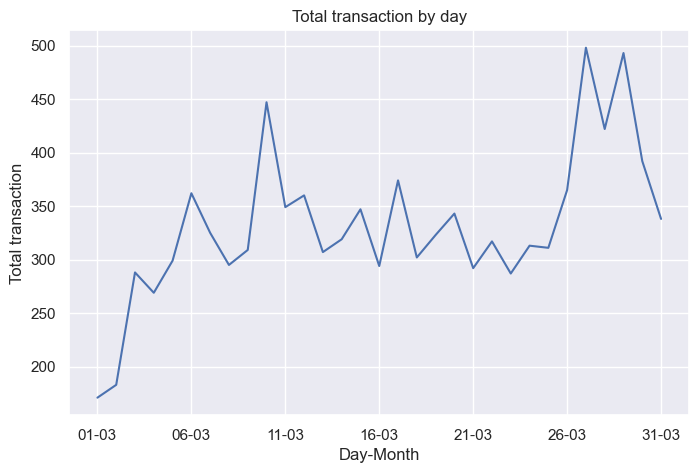

In [739]:
# Transaction_p3=Transaction_p3.groupby('DATE')['User_id'].count().reset_index()
# fig, ax = plt.subplots(figsize=(8, 5))
# plt.plot(Transaction_p3['DATE'],Transaction_p3['User_id'])
# ax.set(xlabel='Day-Month', ylabel='Total transaction', title='Total transaction by day');

fig, ax = plt.subplots(figsize=(8, 5))
Transaction_p3['DATE'].value_counts().sort_index().plot(kind='line',ax=ax)
ax.set(xlabel='Day-Month', ylabel='Total transaction', title='Total transaction by day');

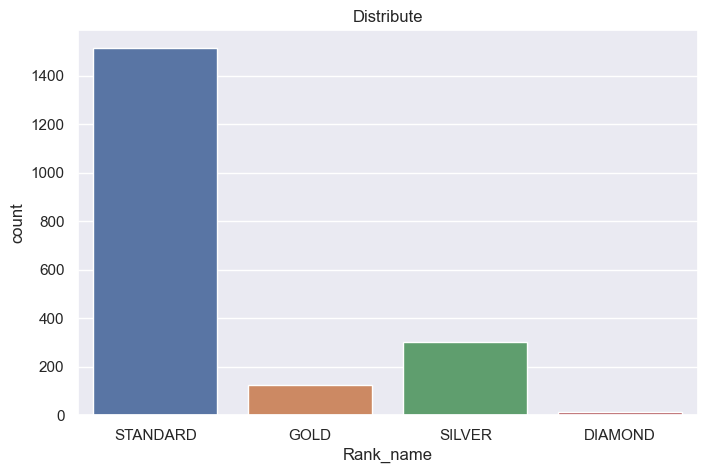

In [740]:
fig,ax=plt.subplots(figsize=(8,5))
sns.countplot(data=Loyalty_Ranking,x='Rank_name')
ax.set(title="Distribute");

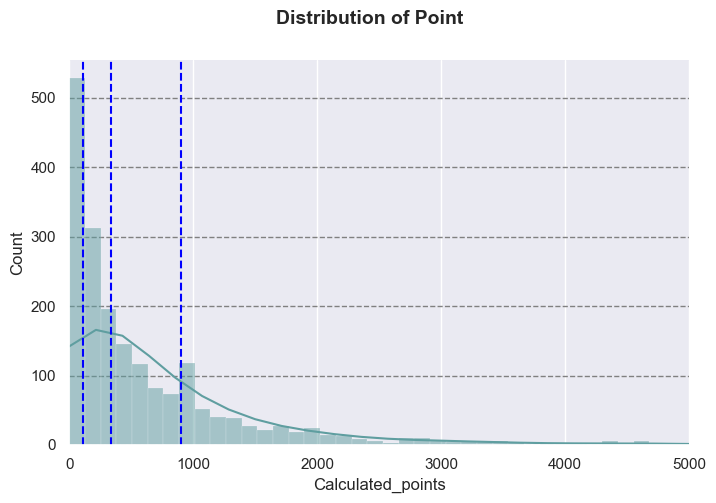

In [741]:
fig, ax = plt.subplots(figsize=(8,5))
ax=sns.histplot(data=Loyalty_Ranking, x=Loyalty_Ranking['Calculated_points'], kde=True, color='#5f9ea0')
ax.axvline(np.percentile(Loyalty_Ranking['Calculated_points'], 25), color="blue", linestyle="--")
ax.axvline(np.percentile(Loyalty_Ranking['Calculated_points'], 50), color="blue", linestyle="--")
ax.axvline(np.percentile(Loyalty_Ranking['Calculated_points'], 75), color="blue", linestyle="--")
plt.xlim(0, 5000)

# vẽ các đường lưới ngang trên trục y của đồ thị.
ax.yaxis.grid(color='gray', linestyle='dashed')
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở  trục y
ax.tick_params(left=False) 

plt.suptitle('Distribution of Point', fontweight='bold', size=14, horizontalalignment='center')
plt.show();

In [742]:
Loyalty_Ranking['Calculated_points'].describe()

count     1952.000000
mean       728.445697
std       1755.278325
min          1.000000
25%        108.000000
50%        337.000000
75%        900.000000
max      42600.000000
Name: Calculated_points, dtype: float64

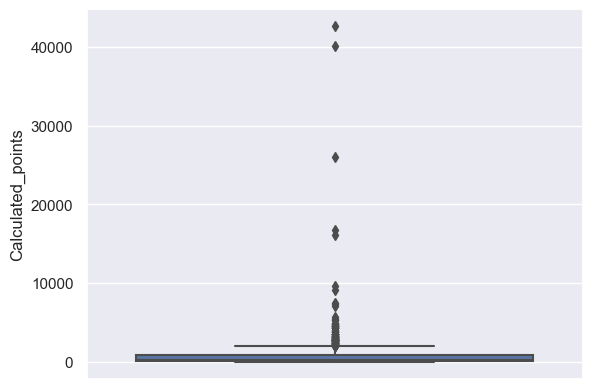

In [743]:
sns.boxplot(y=Loyalty_Ranking['Calculated_points']);